1. [COSF](#przesuniecie)

In [1]:
import btk
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
from ezc3d import c3d
from pyomeca import Markers, Analogs
from matplotlib.pyplot import subplot

In [2]:
import dataprocesing as dp

datapath_fullmove = r"C:\Users\gmultimedia.PJATK8\Desktop\PJATK_K\2020-08-06-B0445-S01-E02-T05.c3d"
datapath_fullmove=r"Z:\Miecz\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E01-T02.c3d"
datapath_fullmove=r"Z:\Miecz\B0444\2020-08-05-B0444-S01\2020-08-05-B0444-S01-E03-T02.c3d"

datapath_singlemove = r"Z:\baza\2020-08-05-B0444-S01-E01-T01-K1.c3d"
folder_path=r"Z:\Miecz\\"

In [3]:
emg_data = dp.read_analog_allmuscles(datapath_fullmove)
emg_renamed = dp.rename_emg(emg_data)
normalised_emg=dp.normalize_emg(emg_renamed)

[2115, 4590, 6935, 9495, 11440, 13915, 19130, 21740, 23505, 26160] [4590, 6935, 9495, 11440, 13915, 19130, 21740, 23505, 26160, 28455]


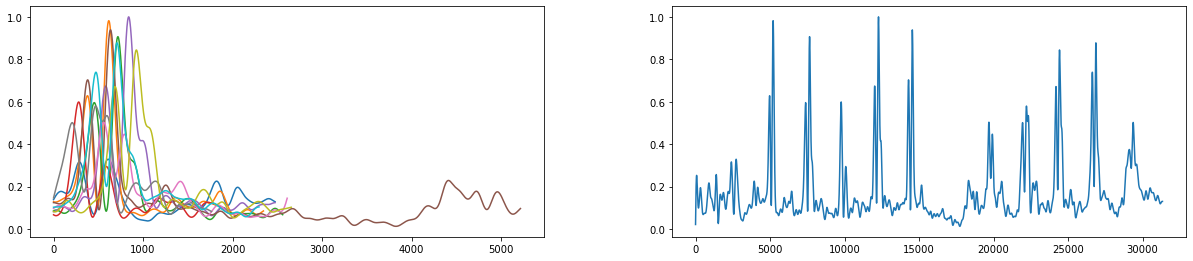

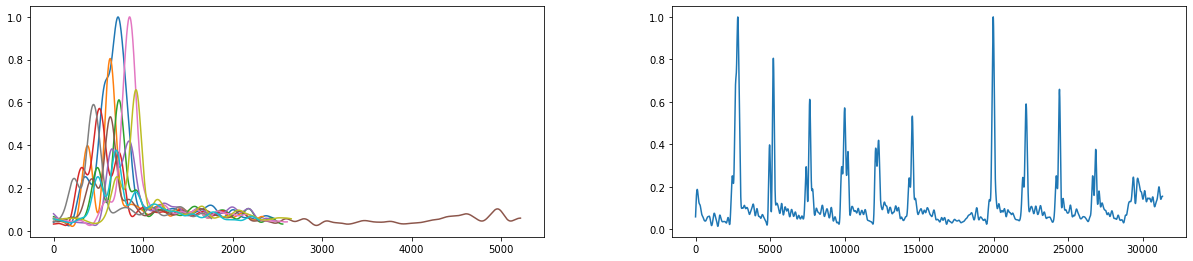

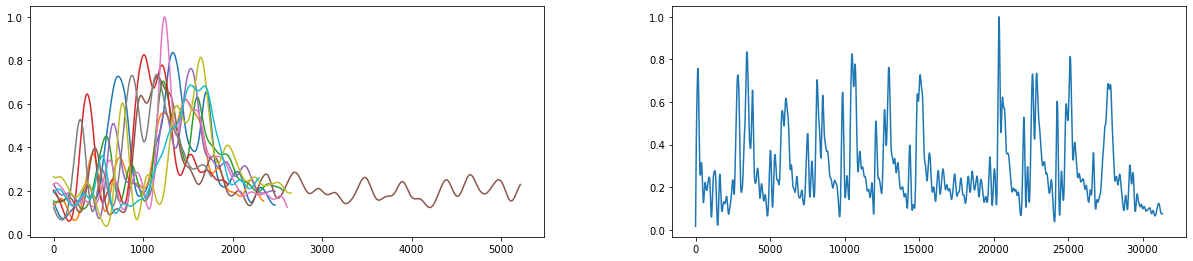

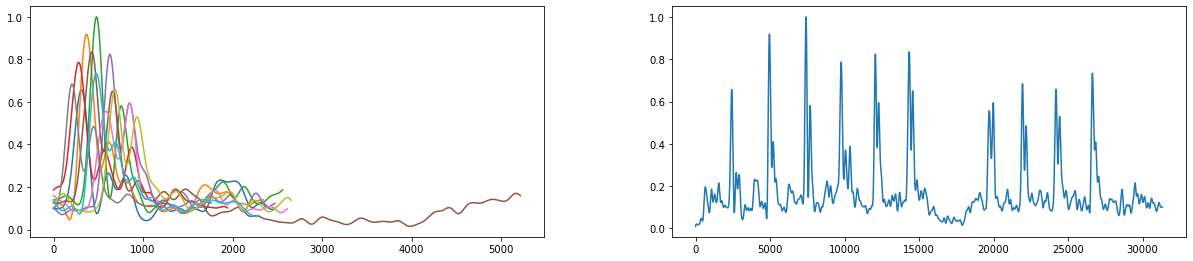

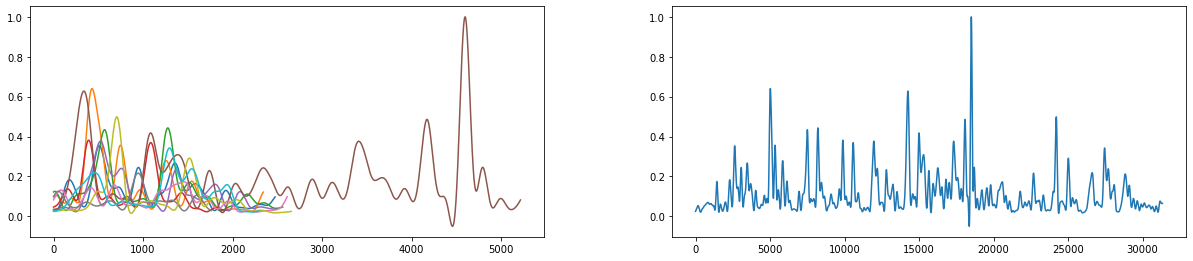

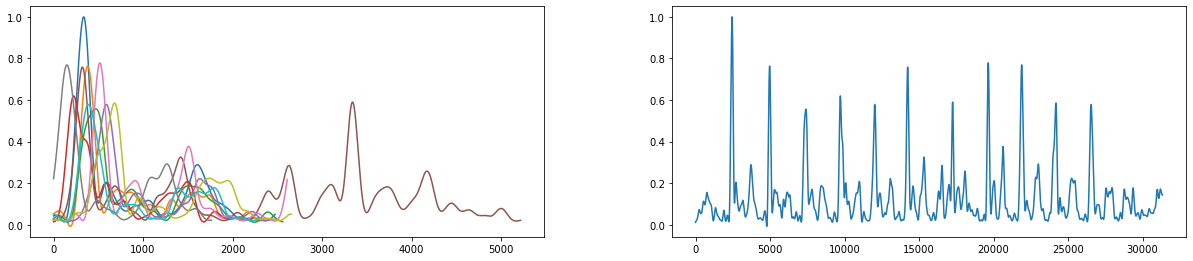

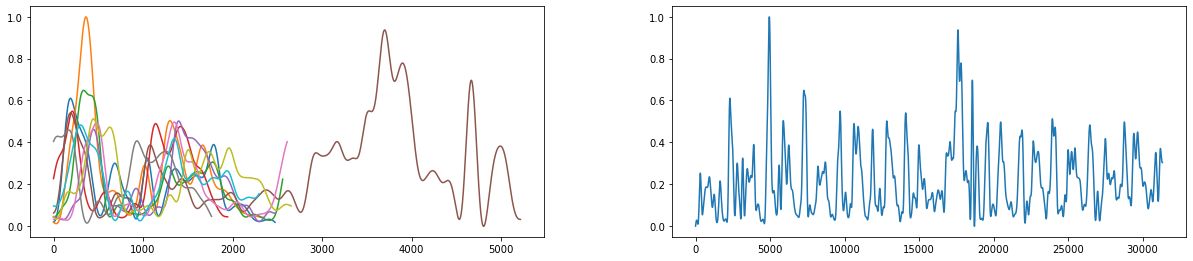

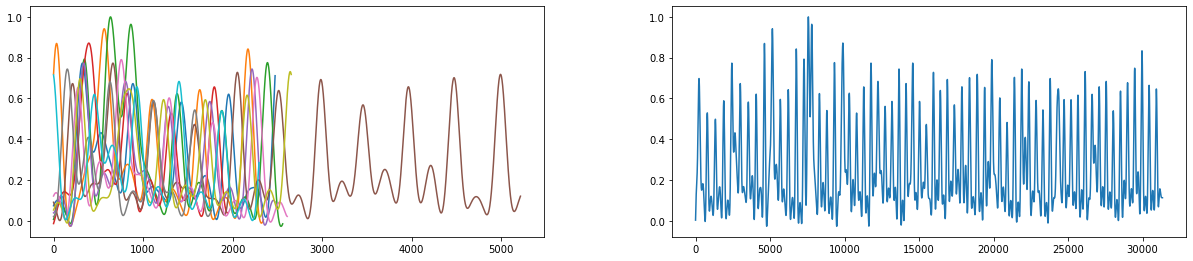

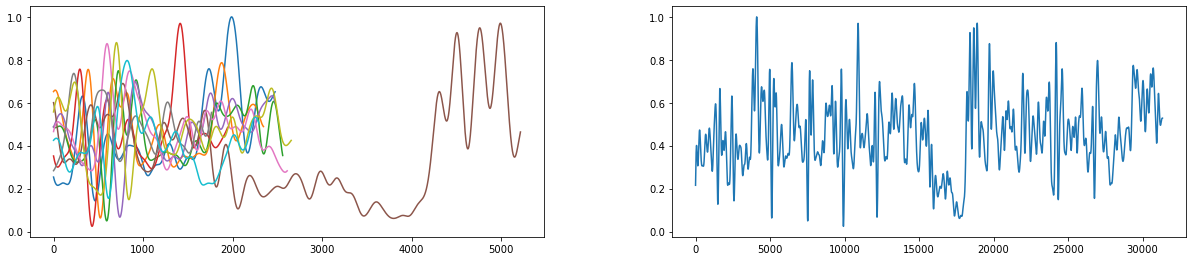

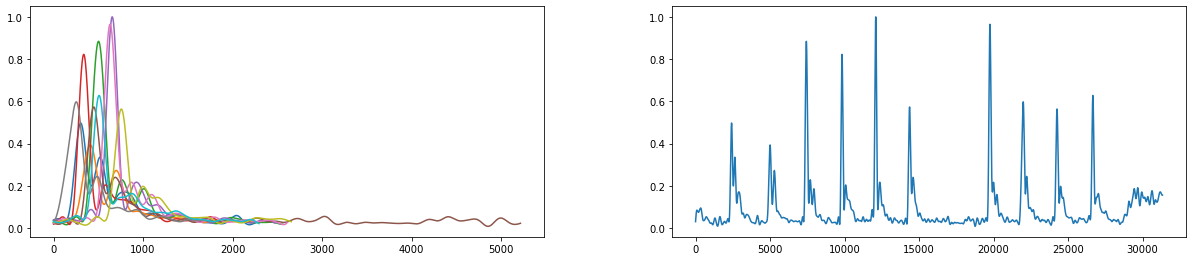

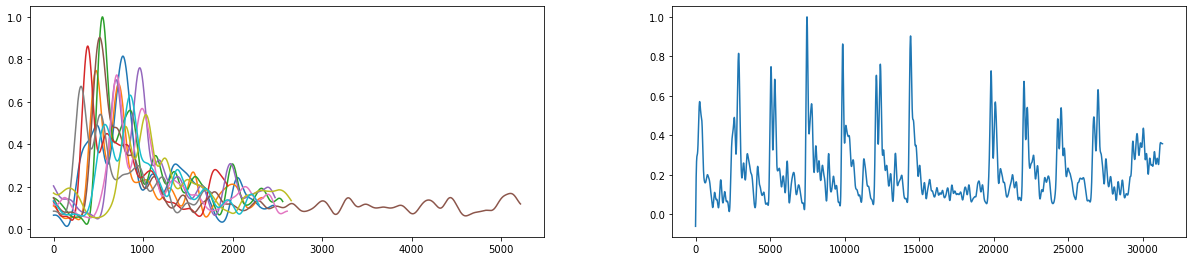

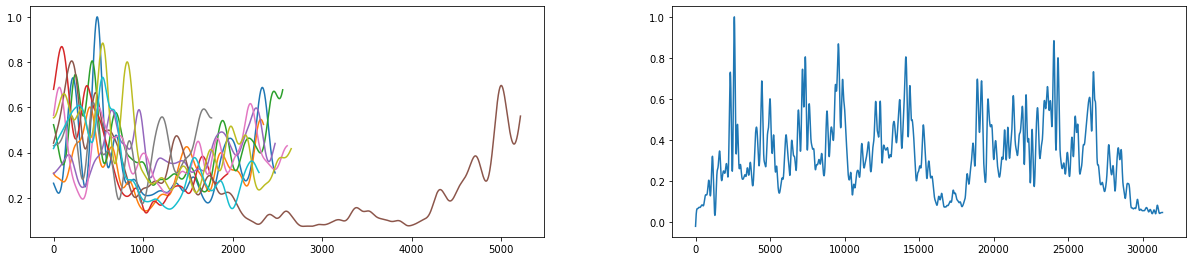

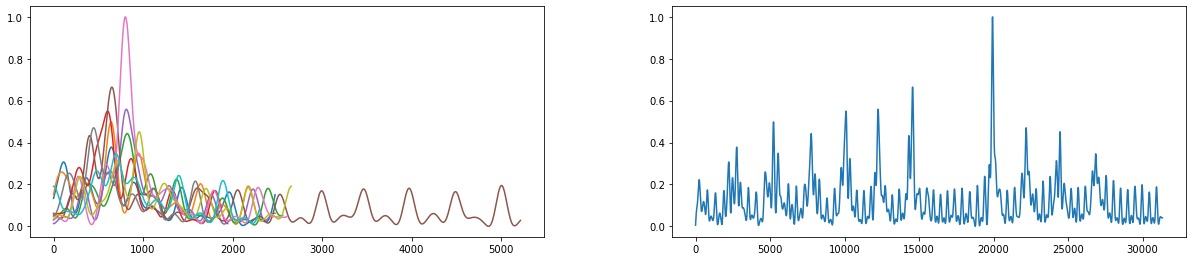

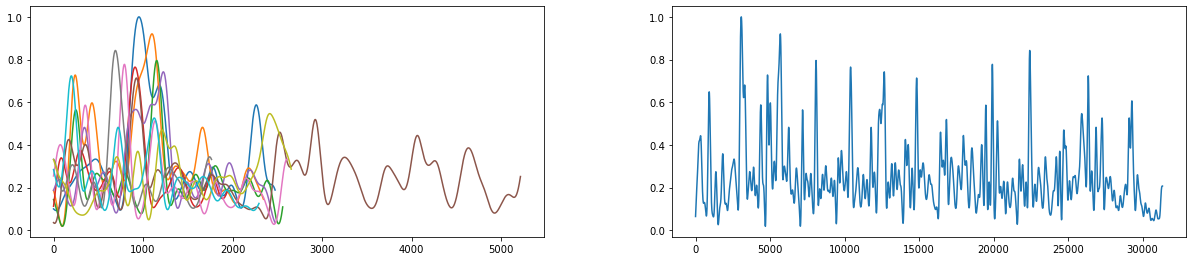

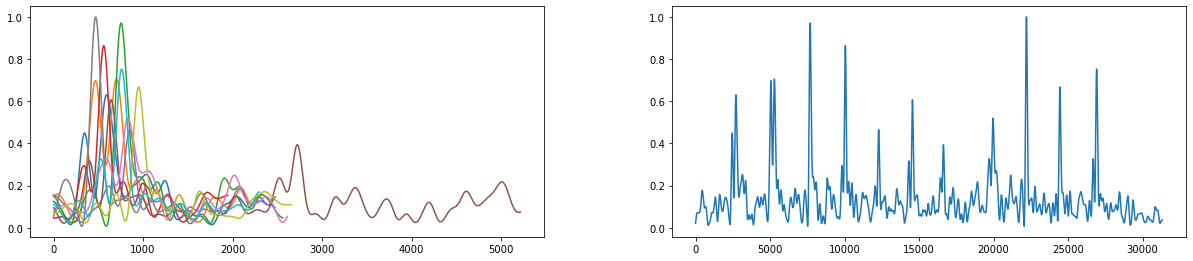

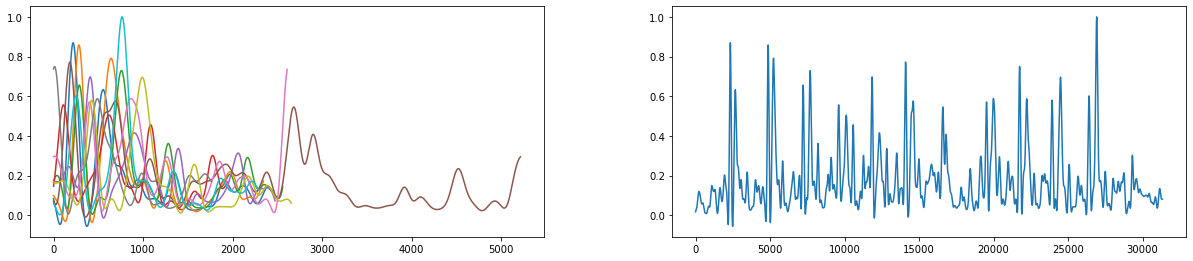

In [4]:
dp.show_events(datapath_fullmove)

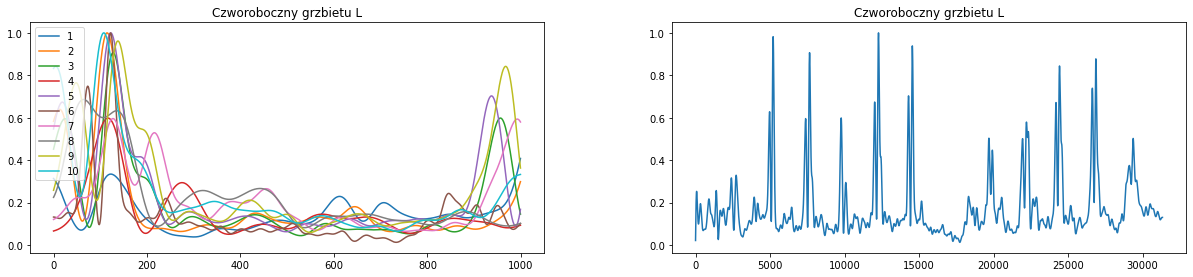

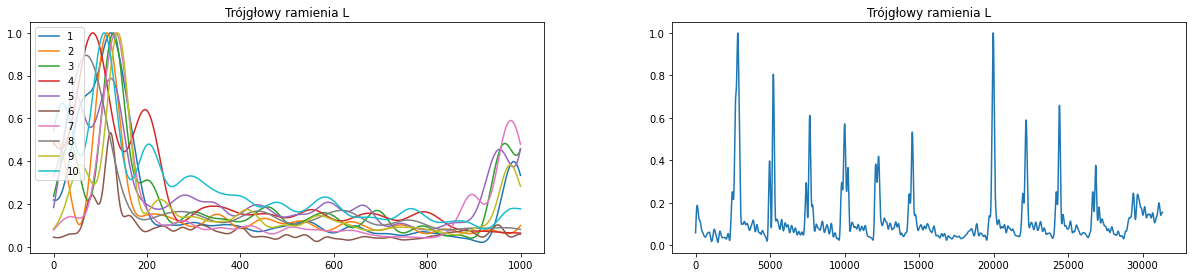

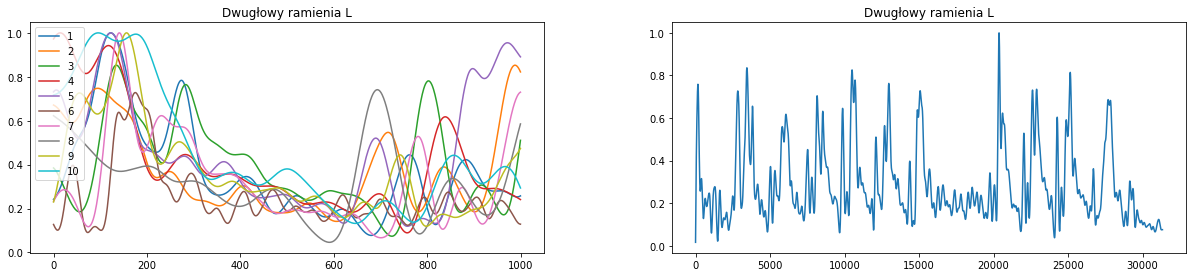

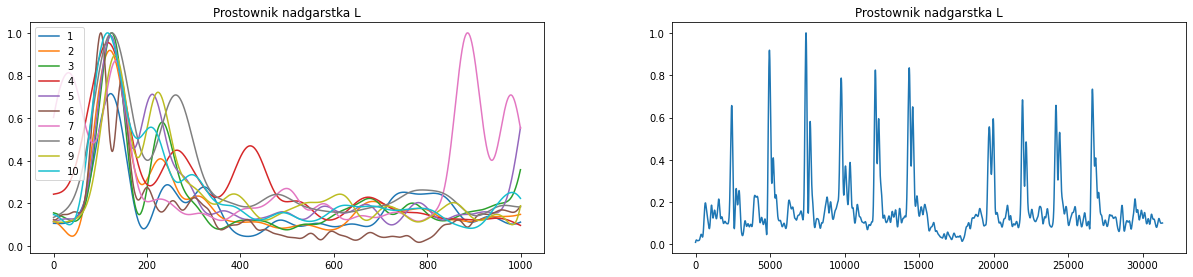

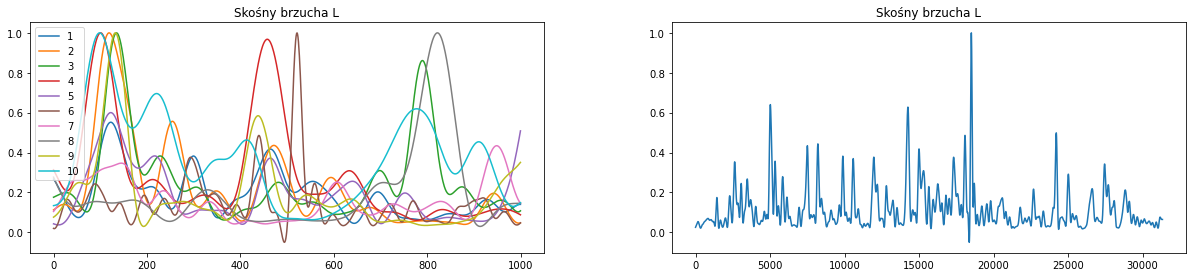

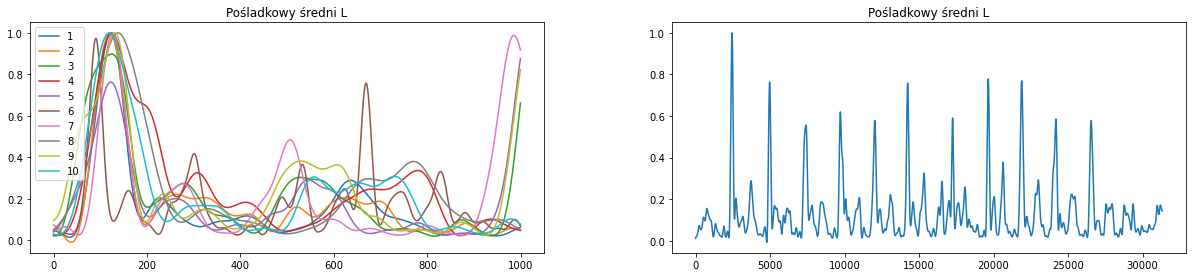

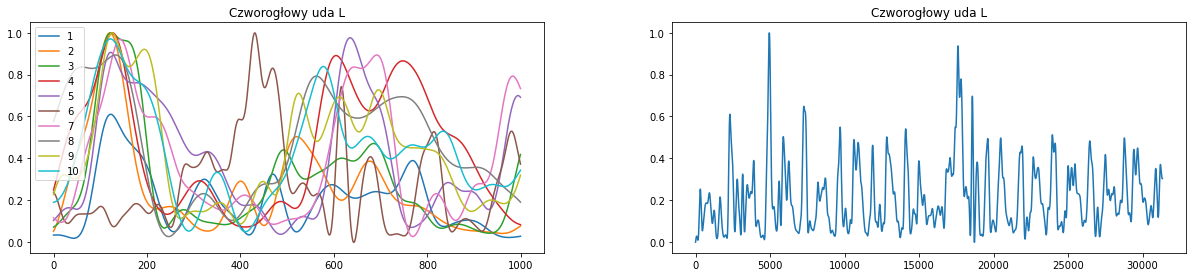

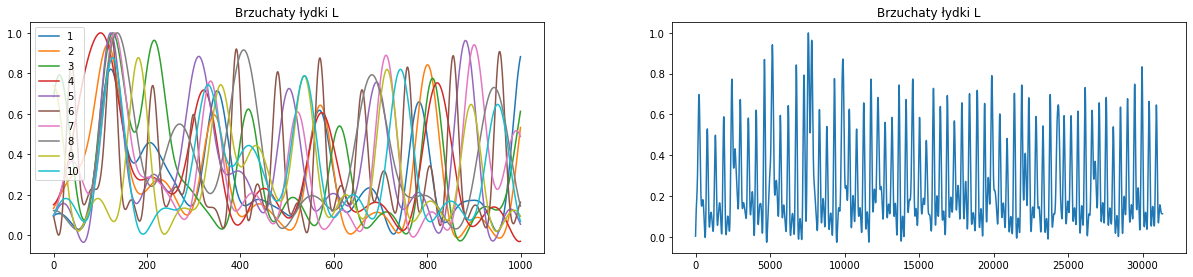

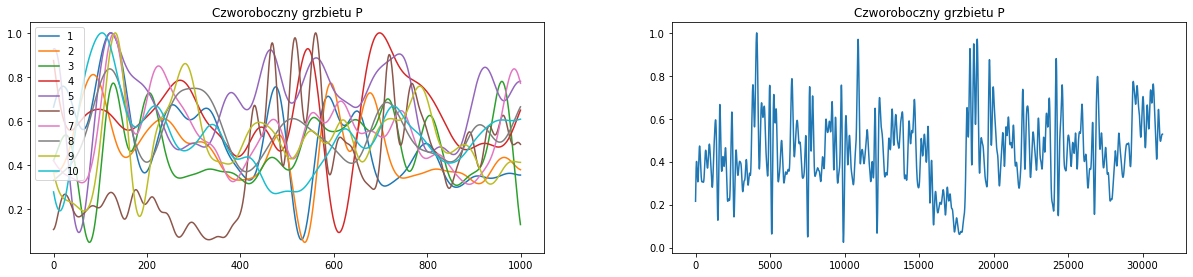

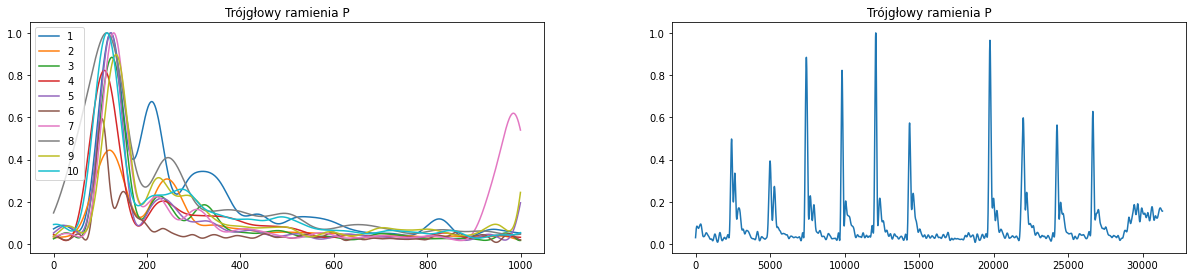

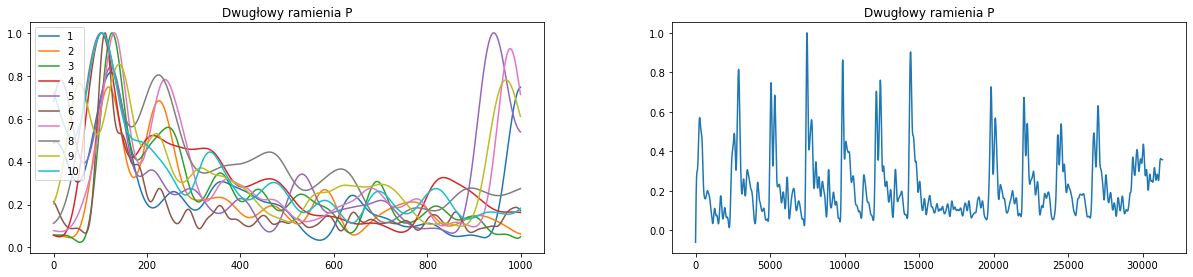

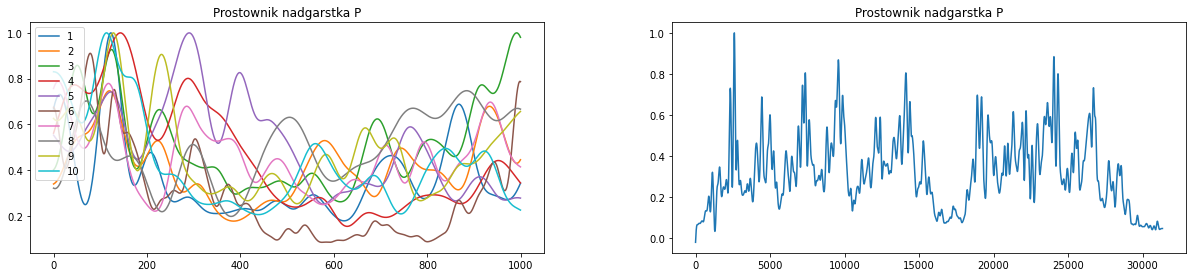

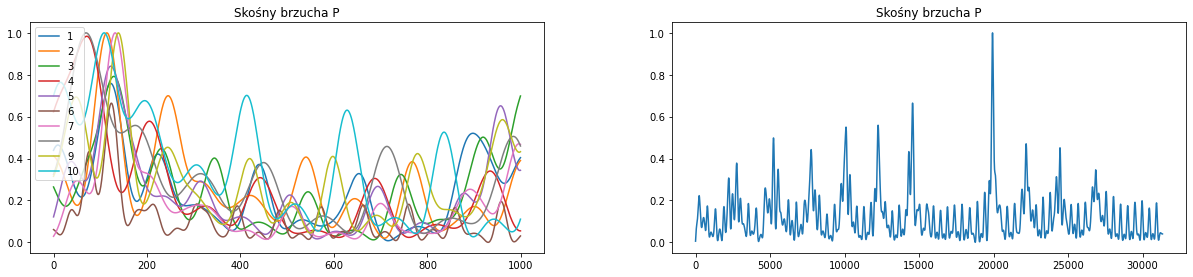

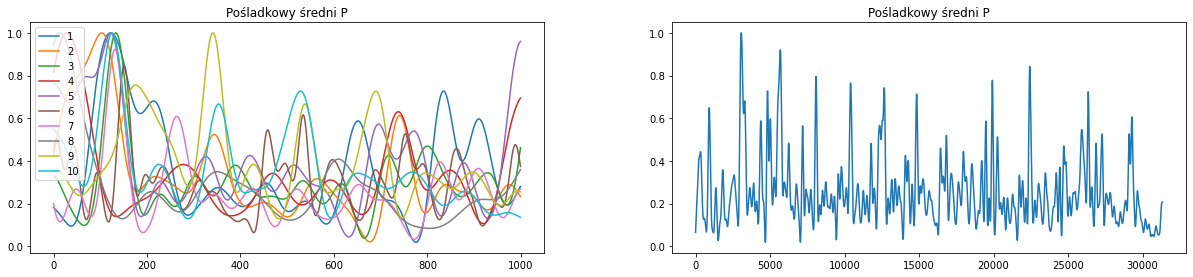

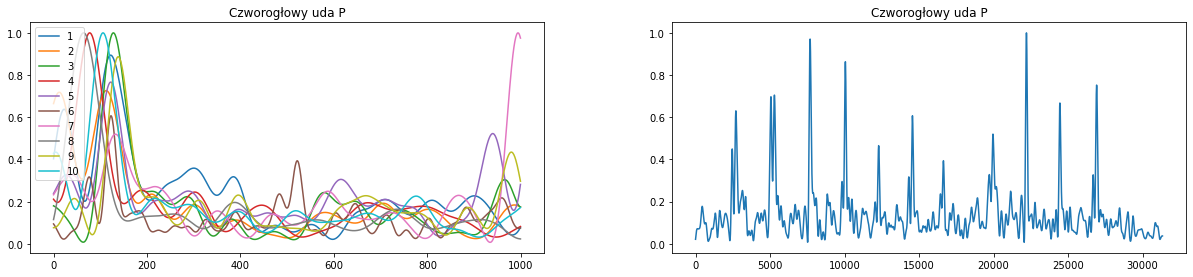

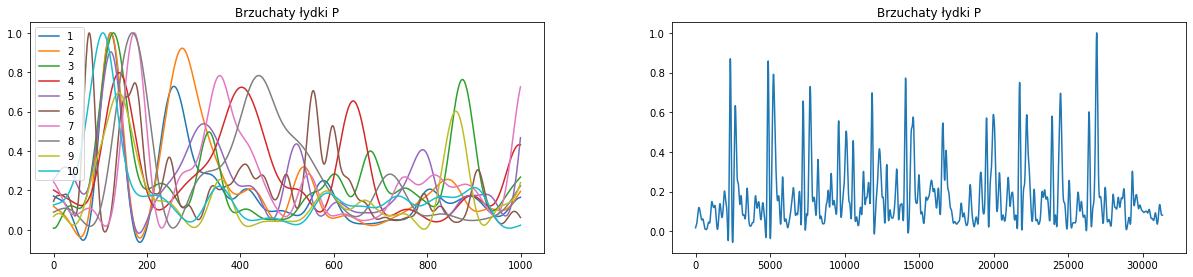

In [5]:
dp.show_events_norm_shifted(datapath_fullmove)

### cos <a name="przesuniecie"></a>

In [6]:
def find_max_frame(p,d,analogs):
    
    val_arr=[]
    for frame in range(len(analogs)):
        val_arr.append(analogs[frame].values)
    max_val=max(val_arr)
#     print(max_val)
#     print(val_arr.index(max_val))
#     print(len(analogs))
    frame_size=len(analogs)
    
    
    return [val_arr.index(max_val),frame_size]

In [7]:
def find_new_start(p,d,analogs,max_frame,frame_size,event_num):

    val_arr=[]
    analogs=analogs[p:d]
    analogs=analogs.meca.time_normalize(n_frames=frame_size) #usunac przy tworzeniu bazy!
    
    for frame in range(len(analogs)):
        val_arr.append(analogs[frame].values)
    max_val=max(val_arr)
    this_max_frame=val_arr.index(max_val)
    
    #dif=this_max_frame-p
    
    #s=p+(max_frame-this_max_frame)
    #k=d+(max_frame-this_max_frame) 
    s=p+(this_max_frame-p-max_frame)
    k=d+(this_max_frame-p-max_frame) 
    
#     print(s,k)
    return [s,k]

In [8]:
def show_events_norm_shifted(data_path):
    """
    Funkcja wyświetlająca prace mięsni dla danego świczenia i aktora z przesunięciem ruchów w fazie.

    Input:
    - data_path - ścieżka dostępu do pliku c3d

    Output:
    - Wykresy przebiegów dla danego ćwiczenia z przesunięciem ruchów w fazie

    """
    emg_processed = dp.emg_full_preproces(data_path)

    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]

    p,d=dp.read_labels(data_path, 1000)
    max_frame, frame_size=find_max_frame(p,d,emg_processed[9][p[0]:d[0]])
    for num in range(16):
        
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)

        for i in range(len(p)): 
                       
            
            s,k=find_new_start(p[i],d[i],emg_processed[num],max_frame,frame_size,i+1)
            
            
            emg_processed_event=emg_processed[num][(p[i]+s):(d[i]+k)]
            emg_processed_event2 = (
            emg_processed_event.meca.normalize(scale=1)                
            )
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=2000)
#             if i==9:
#                 time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=(int)(1000*(len(emg_processed[9][p[9]:d[9]])/k)))
#             else:
#                 time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=1000)
                
            time_normalized=time_normalized[:1000].meca.time_normalize(n_frames=1000)
                
            plt.plot(time_normalized, label=i+1)     
            plt.title(muscles_names[num])
            plt.legend(loc='upper left')

        subplot(1, 2, 2)
        plt.plot(emg_processed[num])
        plt.title(muscles_names[num])
        plt.show()

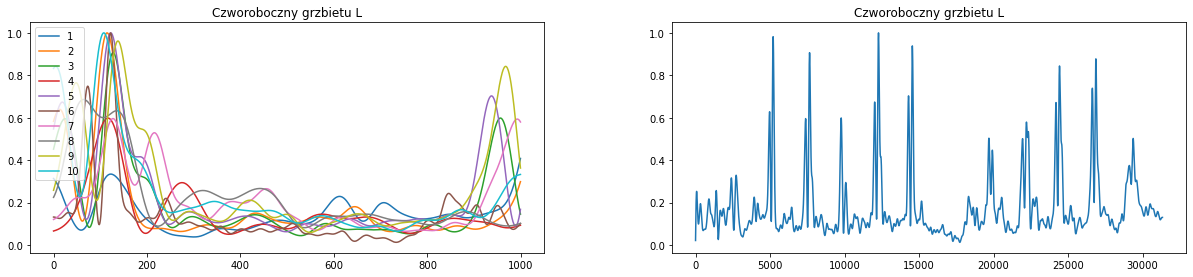

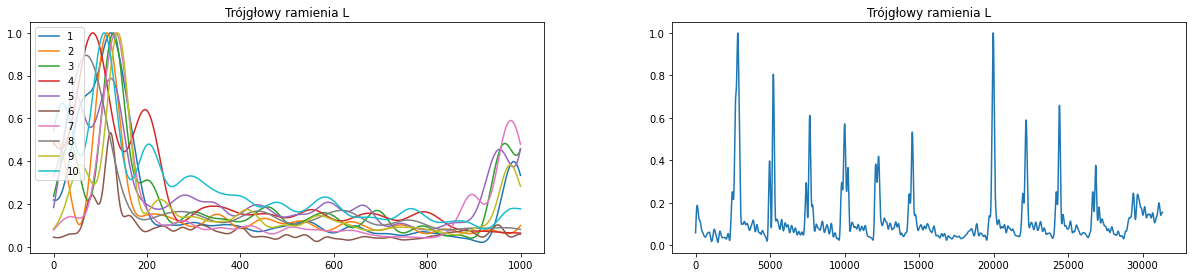

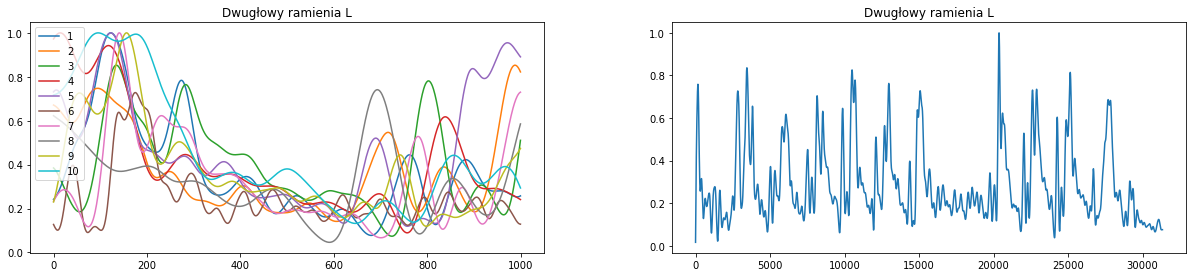

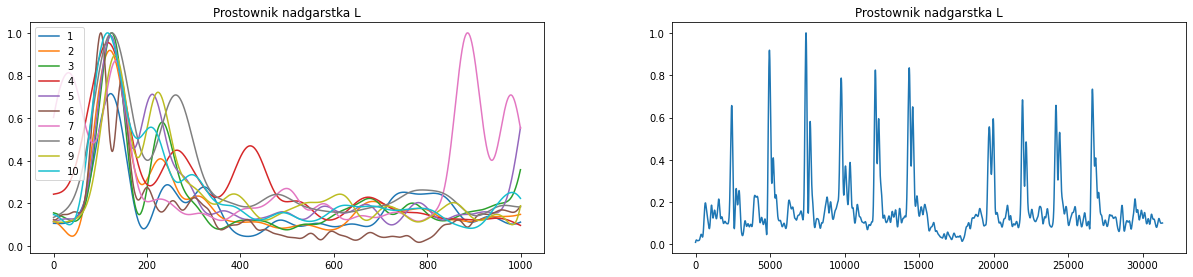

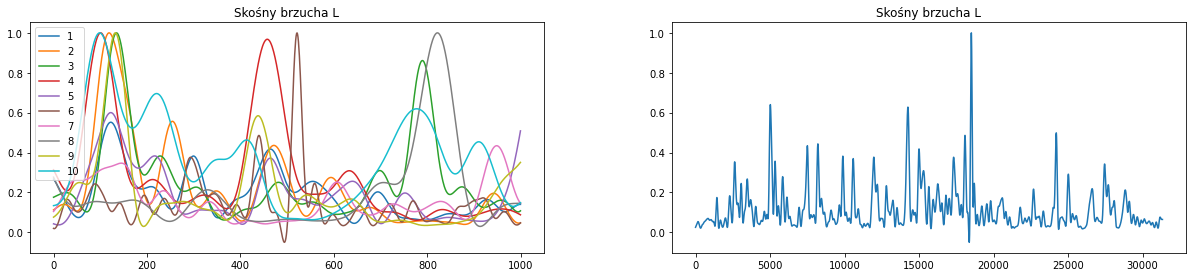

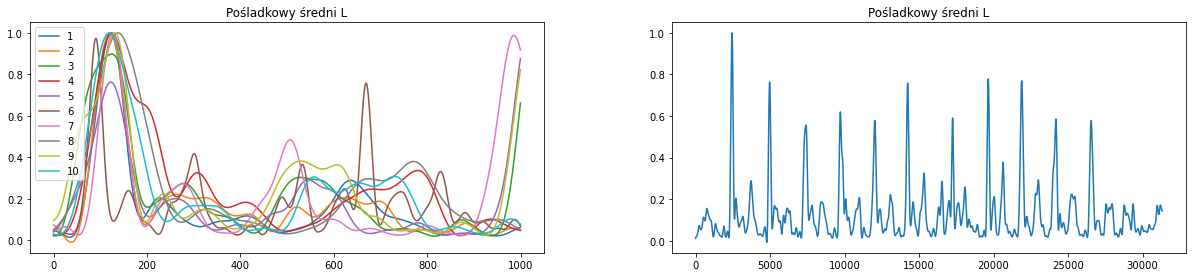

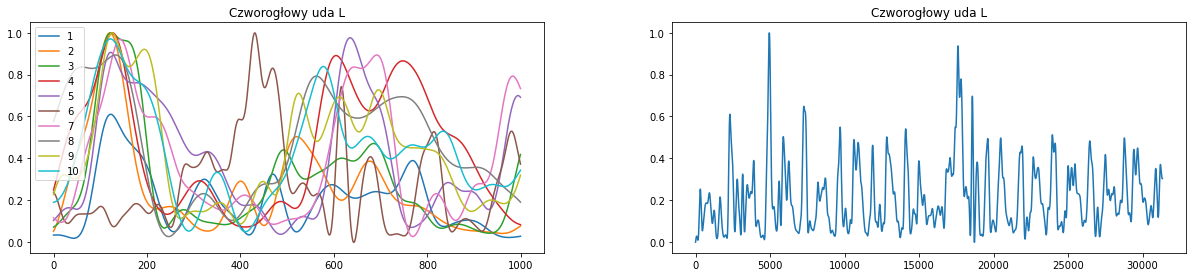

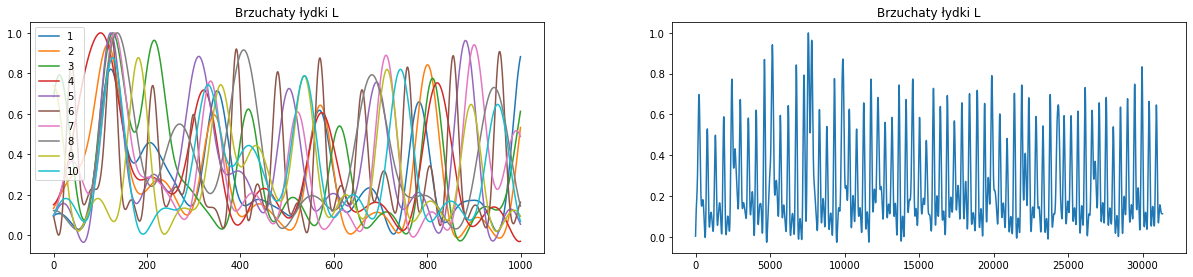

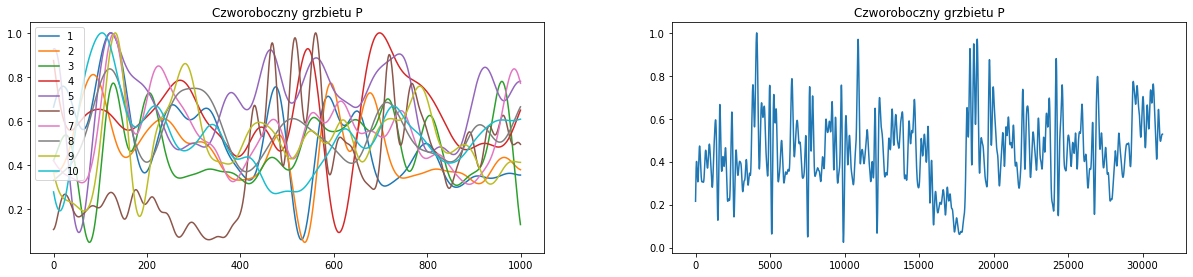

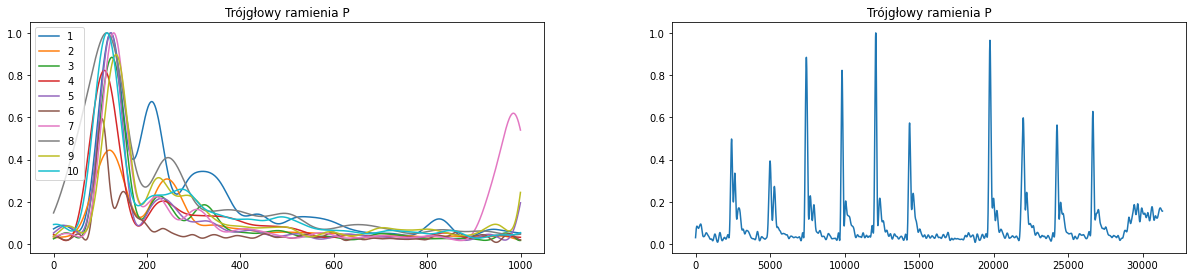

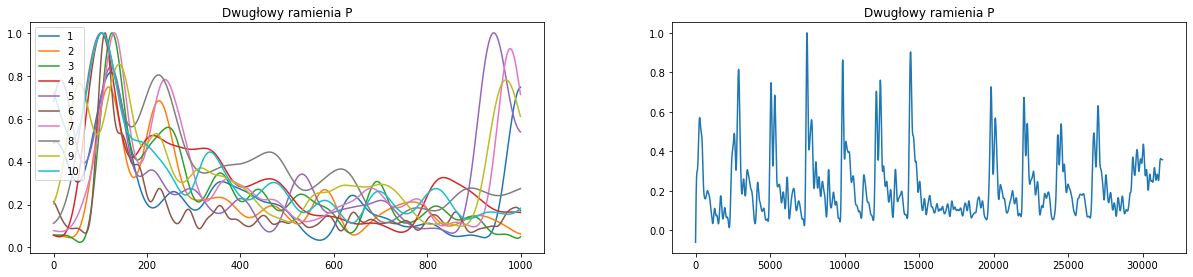

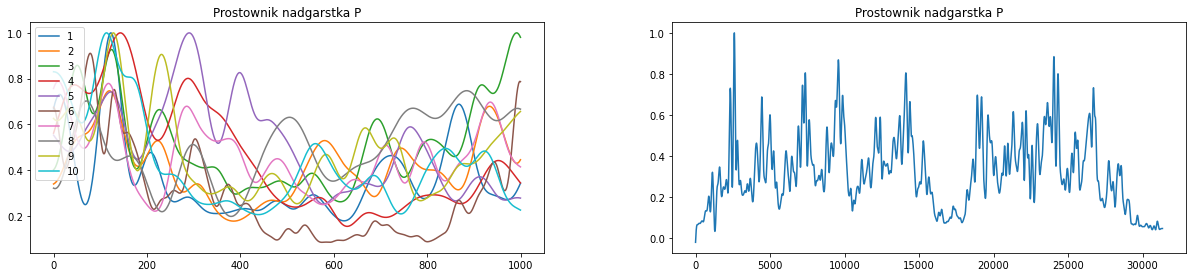

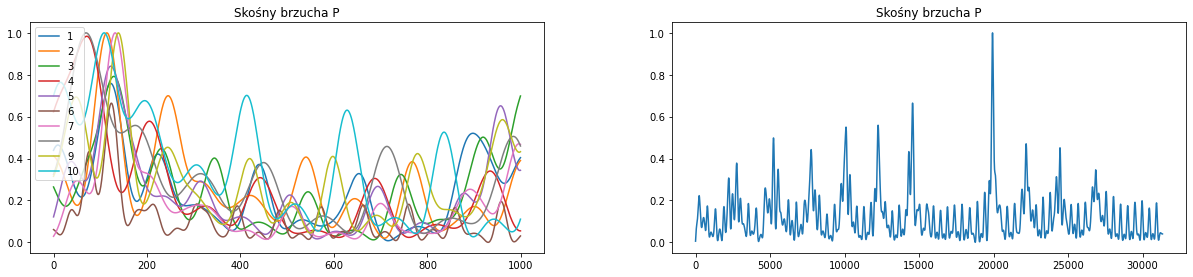

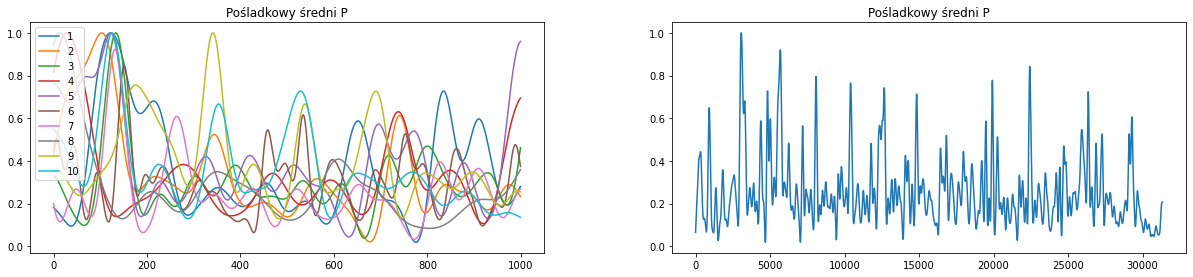

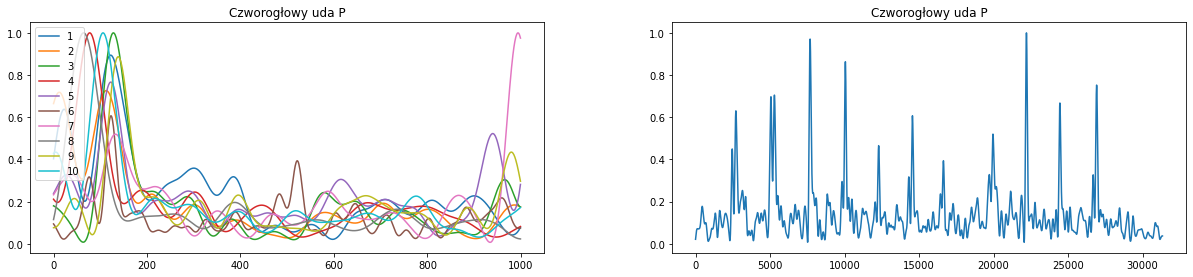

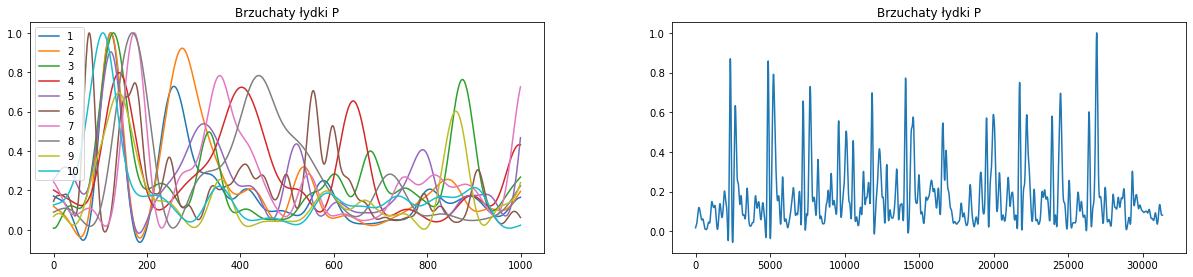

In [9]:
show_events_norm_shifted(datapath_fullmove)

In [10]:
def compare_events_average_shifted(folder_path, person, exer_num):
    """
    Funkcja wyświetlająca uśrednioną prace mięsni dla danego świczenia i aktora z przesunięciem ruchów w fazie.
    
    Input:
    - folder_path - ścieżka dostępu do folderu z wszystkimi nagraniami
    - person - Nazwa aktora do wczytania
    - exer_num - Nazwa ćwiczenia do wczytania
    
    Output:
    - Wykresy średnich przebiegów dla danego ćwiczenia z przesunięciem ruchów w fazie
    
    """
	
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all=np.zeros((16,1000))     
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=dp.emg_full_preproces(file)
        
                
        aver_arr=np.zeros((16,1000))  
        file_num=0

        p,d=dp.read_labels(file, 1000)
        ev=[p,d]
        max_frame, frame_size=dp.find_max_frame(p,d,emg_processed[9][p[0]:d[0]])
        for num in range(16):
          
            for i in range(len(p)):  
                
                s,k=find_new_start(p[i],d[i],emg_processed[num],max_frame,frame_size,i+1)
                
                emg_processed_event=emg_processed[num][(p[i]+s):(d[i]+k)]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )                                           
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)                
    
                for t in range(1000):
                    aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]

            aver_arr[num]=aver_arr[num]/10
            time=np.linspace(1,1000,1000)

            for t2 in range(1000):
                aver_arr_all[file_num][t2]=aver_arr_all[file_num][t2]+time_normalized.values[t2]
            file_num=file_num+1;
            
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names[num])
        plt.show()

Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T01.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T02.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T03.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T04.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T05.c3d


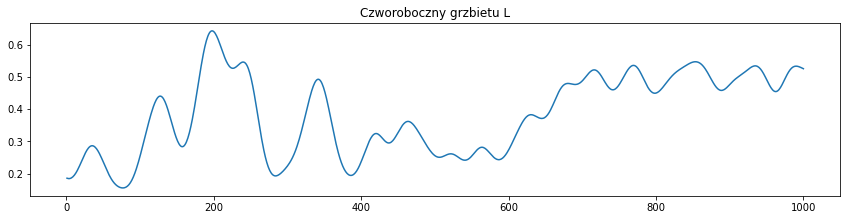

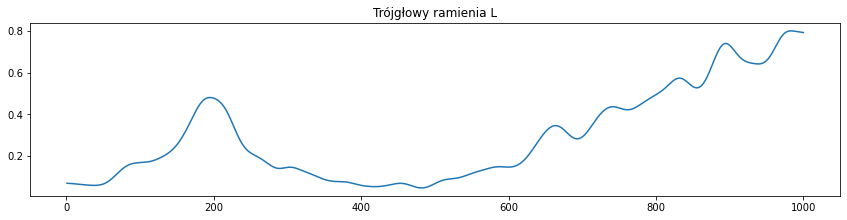

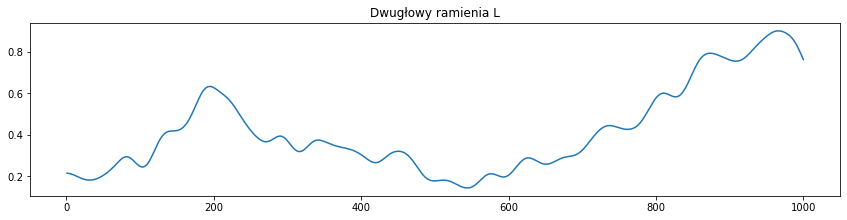

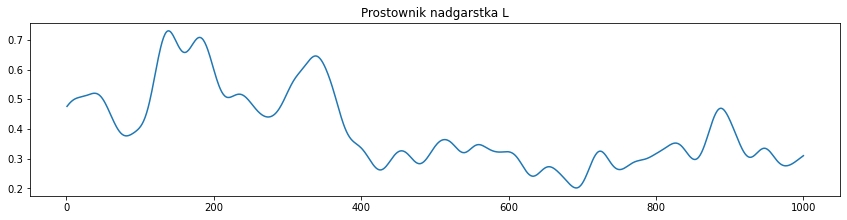

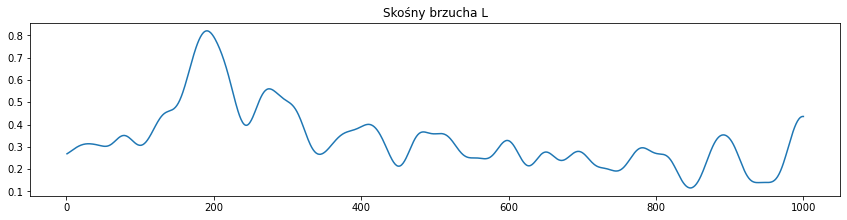

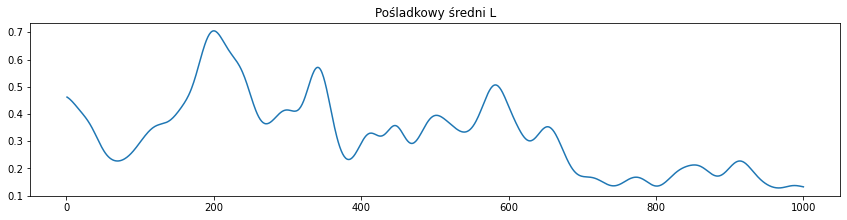

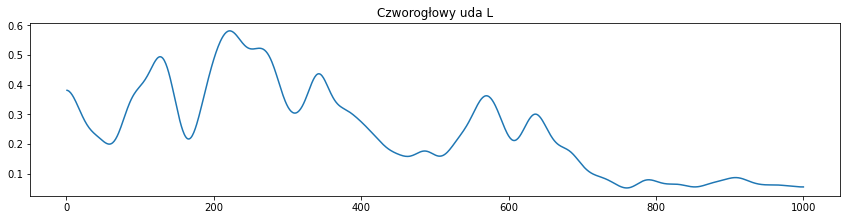

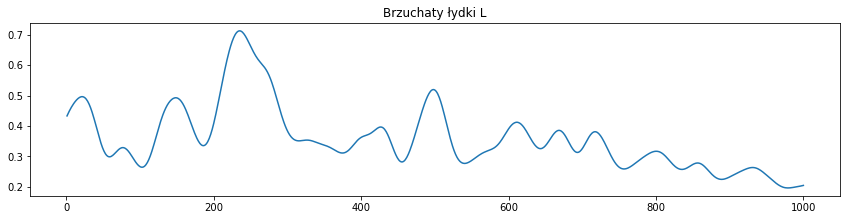

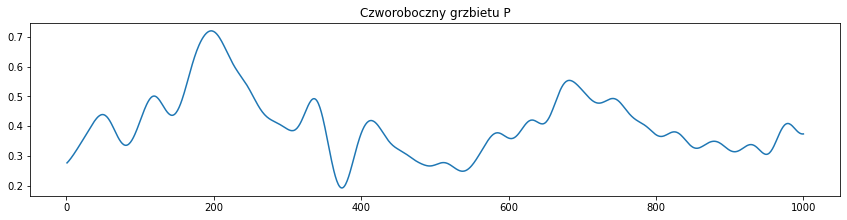

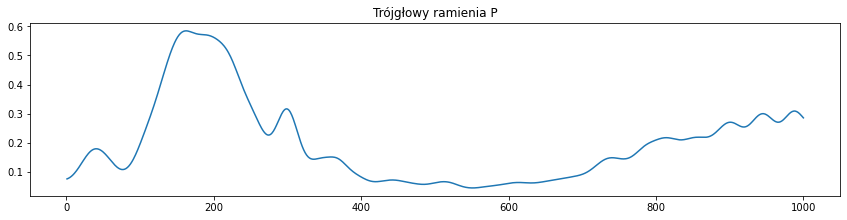

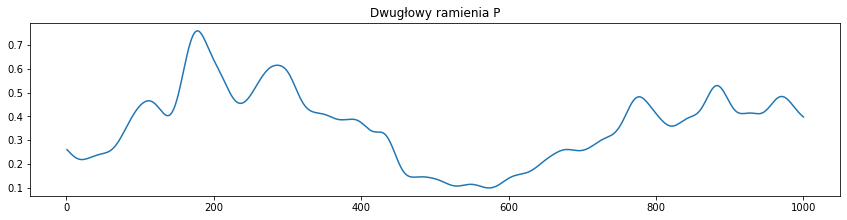

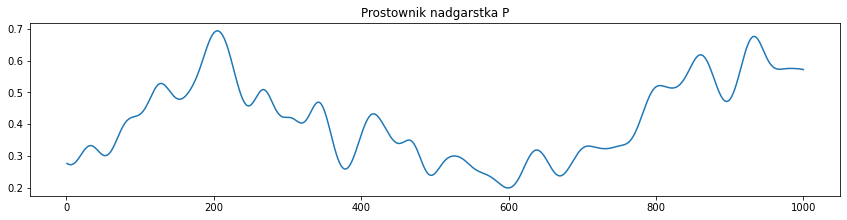

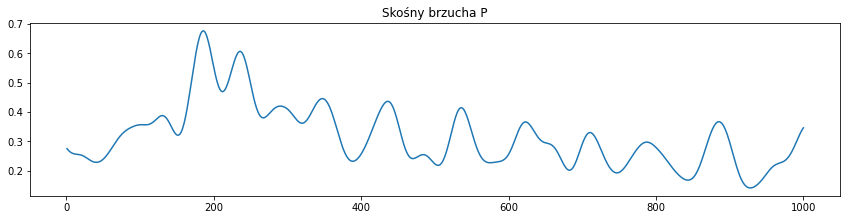

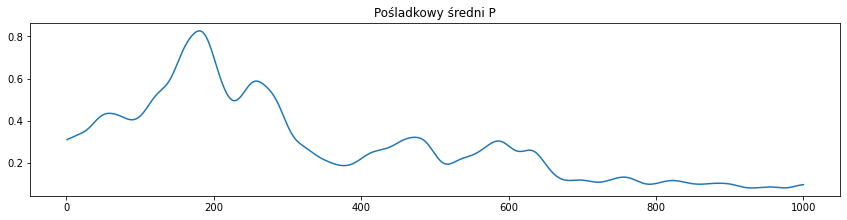

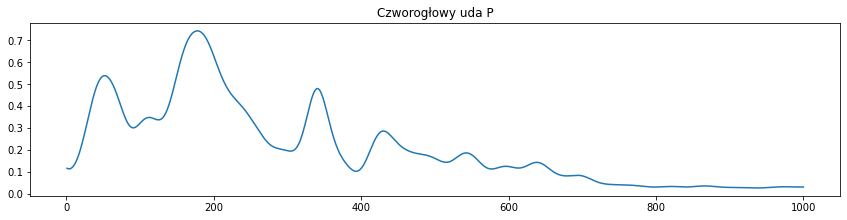

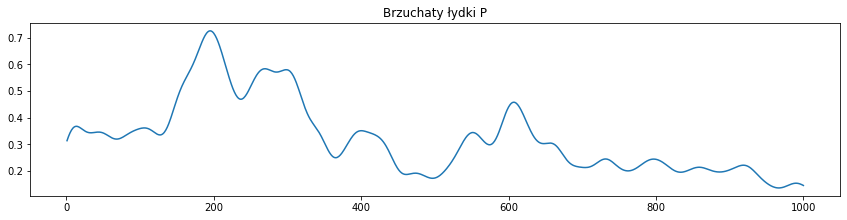

In [11]:
compare_events_average_shifted(folder_path,"B0445", "1")